In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [60]:
# sns.set_theme(style="whitegrid")
sns.set_palette("husl")

In [4]:
df = pd.read_csv("data/churn_modelling_feature_engineering.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,France_Female,40,84,0,0,0.000000,Low,0.499975,2.000000,1,Long-term,0.000000e+00,0,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Spain_Female,40,41,0,0,0.744677,Low,0.999900,1.000000,0,New,5.095518e+07,0,83807.860000
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,France_Female,40,336,0,1,1.401375,Low,0.374995,2.666667,0,Long-term,8.014972e+07,0,53220.266667
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,France_Female,30,39,0,0,0.000000,Medium,1.999800,0.500000,0,New,0.000000e+00,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Spain_Female,40,86,0,1,1.587055,High,0.499975,2.000000,1,Long-term,1.066842e+08,1,125510.820000


In [66]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Exited'])
y = df['Exited']

rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

df = X
df["Exited"] = y

In [46]:
def num_vs_cat(df, column1, column2="Exited"):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=column1, hue=column2, bins=50, kde=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(data=df, x=column2, y=column1, ax=axes[0])
    axes[0].set_title(f"{column1}, {column2} Boxplots")
    sns.stripplot(x=column2, y=column1, data=df, jitter=True, ax=axes[1])
    axes[1].set_title(f"{column1}, {column2} Jitter plots")

In [112]:
def cat_vs_cat(df, column1, column2='Exited', legend=True):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.heatmap(pd.crosstab(df[column2],df[column1]), ax=axes[0])

    df_counts =  df.groupby([column2, column1]).size().unstack(fill_value=0)
    bottom = pd.Series([0] * df_counts.shape[0], index=df_counts.index)
    colors = sns.color_palette("viridis", len(df_counts.columns))

    for col, color in zip(df_counts.columns, colors):
        axes[1].bar(df_counts.index, df_counts[col], bottom=bottom, label=col, color=color)
        bottom += df_counts[col]

    if legend:
        # Add legend
        axes[1].legend(title=column1)

## CreditScore vs Exited

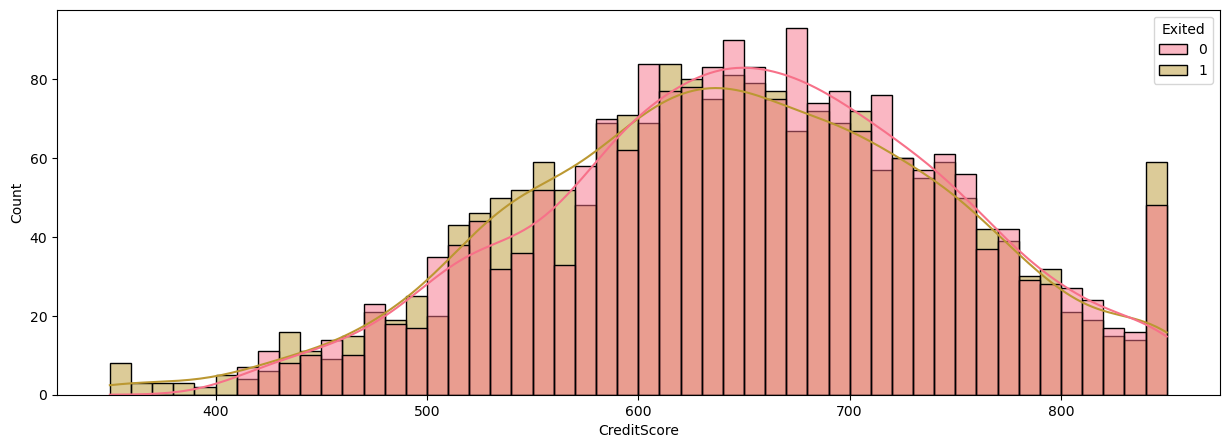

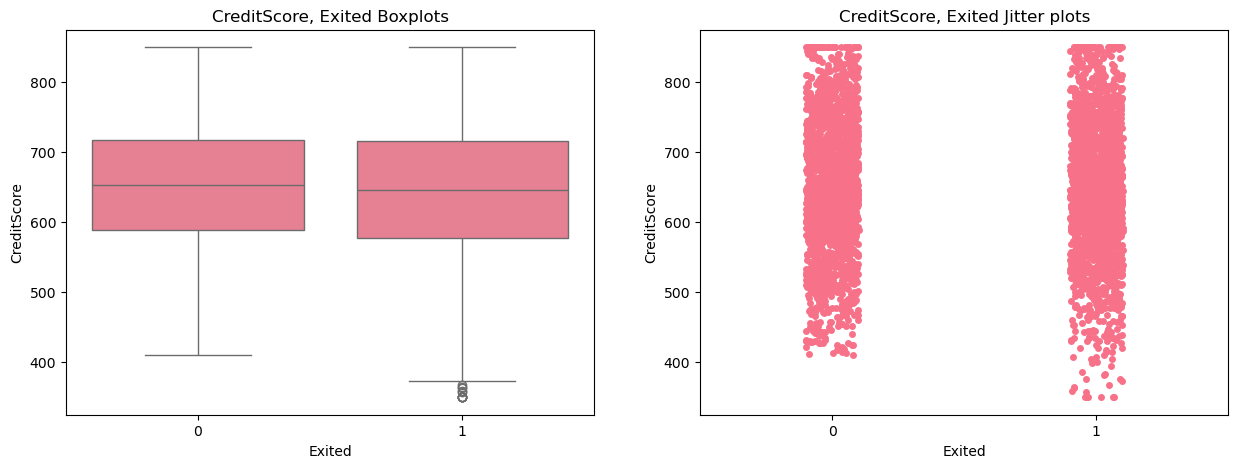

In [67]:
num_vs_cat(df, "CreditScore")

## Geography vs Exited

In [68]:
pd.crosstab(df["Exited"],df["Geography"])

Geography,France,Germany,Spain
Exited,,,
0,1091,431,515
1,810,814,413


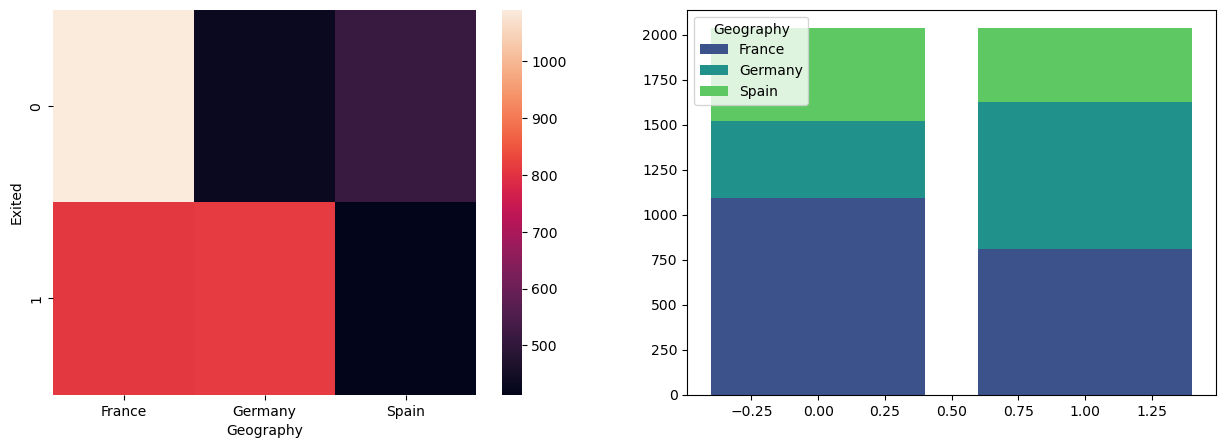

In [69]:
cat_vs_cat(df, "Geography")

In [70]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
4496,701,France,Female,42,6,86167.82,1,1,0,153342.38,France_Female,40,252,0,0,0.561931,Medium,0.166664,6.0,0,Long-term,60403641.82,1,86167.82,0


## Gender vs Exited

In [71]:
pd.crosstab(df["Exited"],df["Gender"])

Gender,Female,Male
Exited,,
0,851,1186
1,1139,898


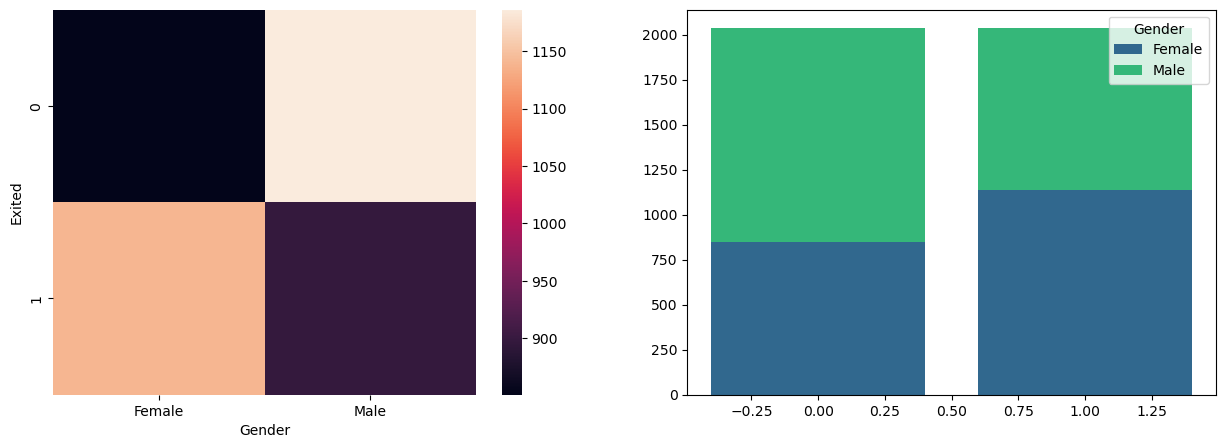

In [72]:
cat_vs_cat(df, "Gender")

## Age vs Exited

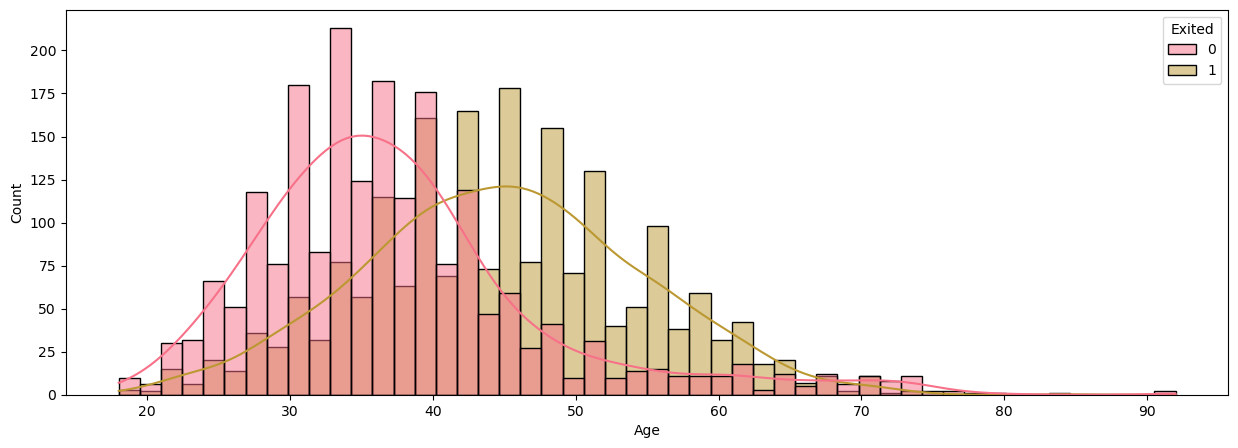

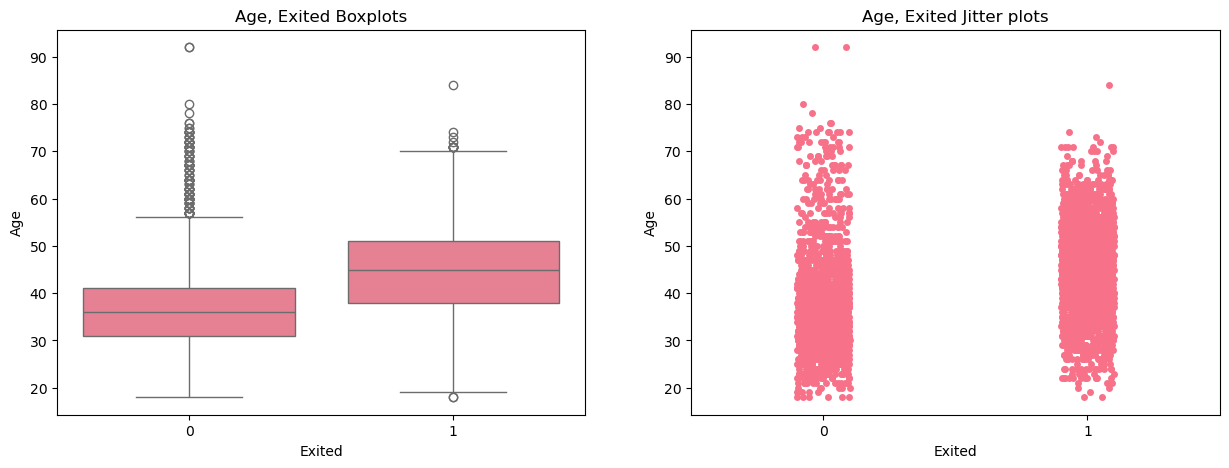

In [73]:
num_vs_cat(df, "Age")

## Tenure vs Exited

In [74]:
pd.crosstab(df["Exited"],df["Tenure"])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,64,197,231,208,229,214,184,208,207,193,102
1,95,232,201,213,203,209,196,177,197,213,101


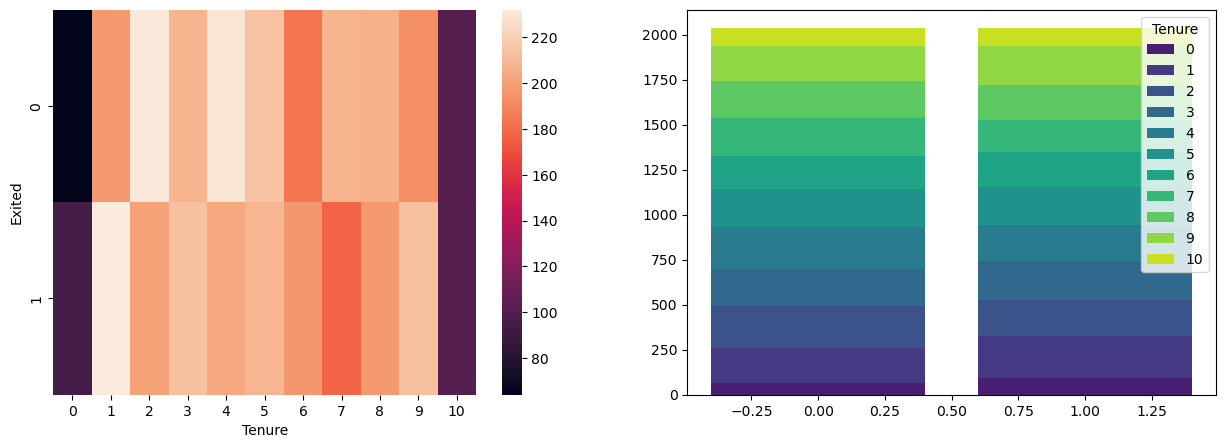

In [75]:
cat_vs_cat(df, "Tenure")

In [76]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
9166,627,Germany,Female,35,2,137852.96,1,1,1,172269.21,Germany_Female,30,70,0,1,0.800218,Low,0.499975,2.0,1,Long-term,86433805.92,0,137852.96,1


## Balance vs Exited

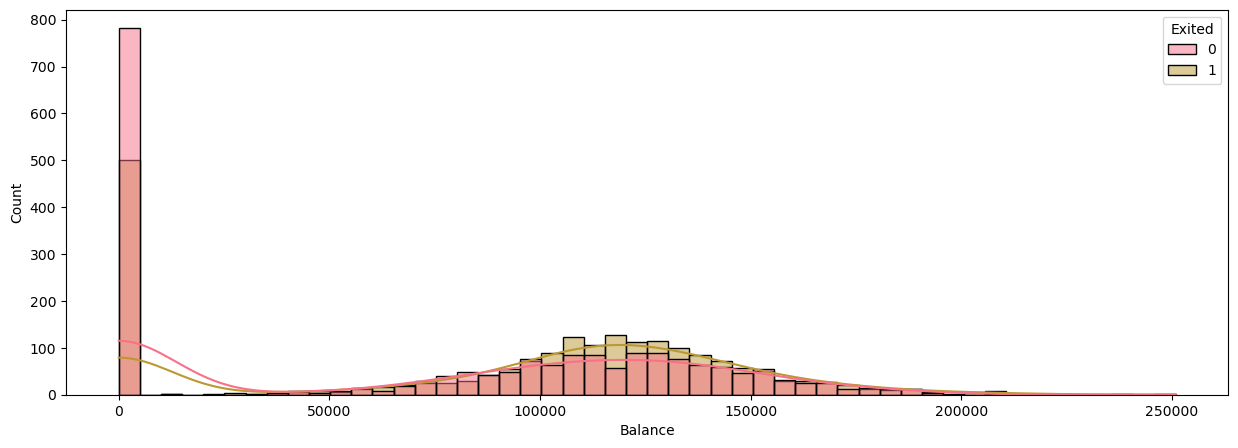

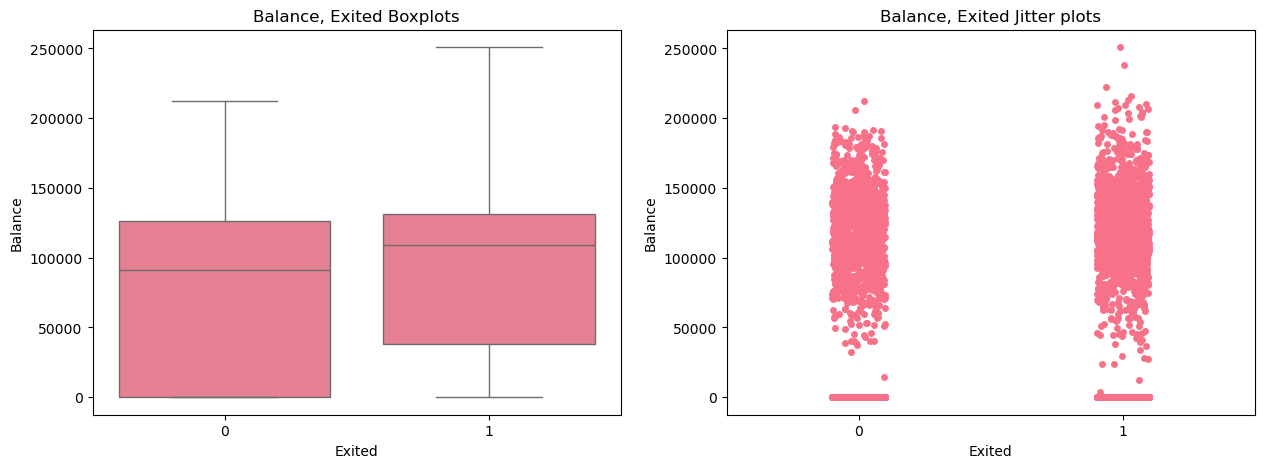

In [77]:
num_vs_cat(df, "Balance")

## NumOfProducts vs Exited

In [79]:
pd.crosstab(df["Exited"],df["NumOfProducts"])

NumOfProducts,1,2,3,4
Exited,,,,
0,934,1088,15,0
1,1409,348,220,60


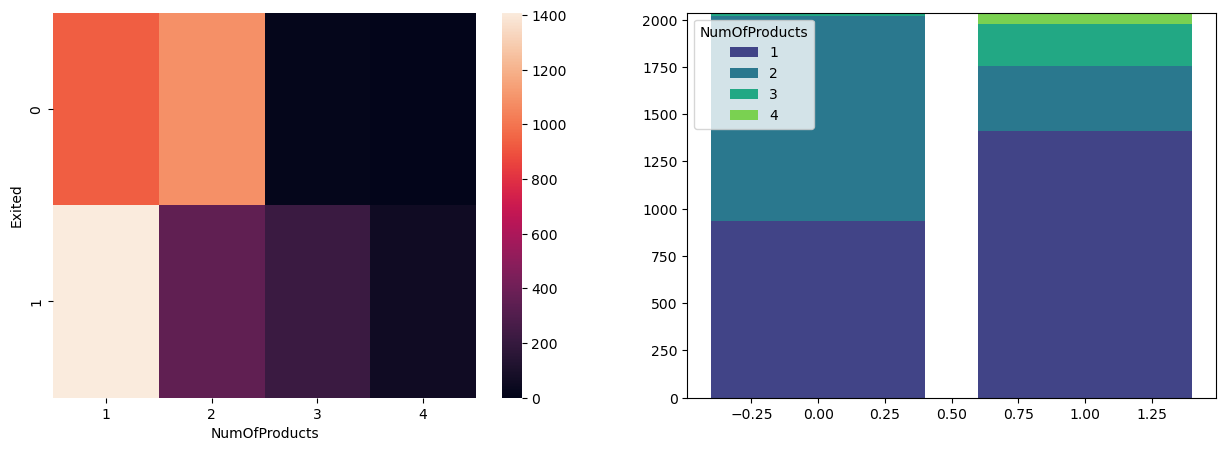

In [78]:
cat_vs_cat(df, "NumOfProducts")

In [80]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
5366,670,Germany,Female,42,5,49508.79,3,1,1,100324.01,Germany_Female,40,210,0,0,0.493489,Medium,0.599988,1.666667,1,Long-term,33170889.3,0,16502.93,0


## HasCrCard vs Exited

In [81]:
pd.crosstab(df["Exited"],df["HasCrCard"])

HasCrCard,0,1
Exited,,
0,580,1457
1,613,1424


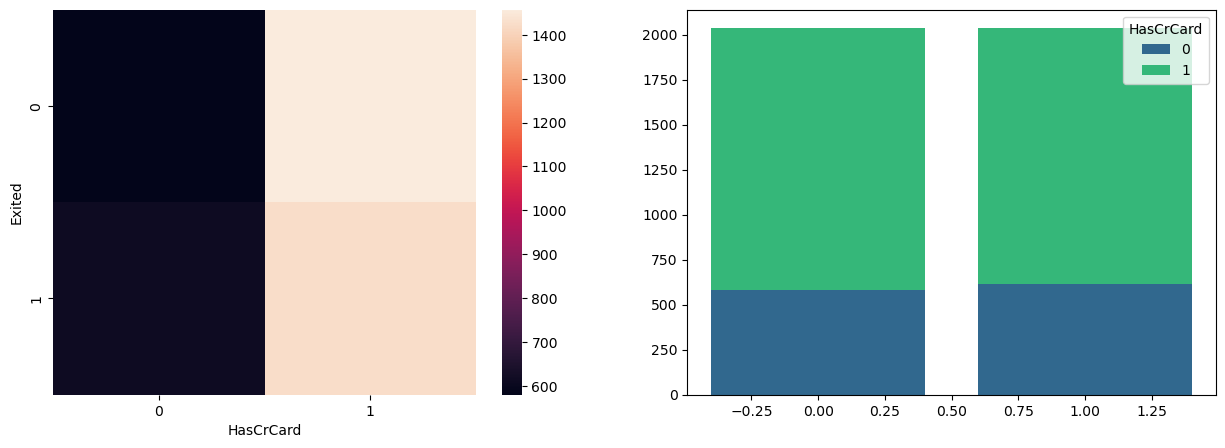

In [82]:
cat_vs_cat(df, "HasCrCard")

## IsActiveMember vs Exited

In [84]:
pd.crosstab(df["Exited"],df["IsActiveMember"])

IsActiveMember,0,1
Exited,,
0,892,1145
1,1302,735


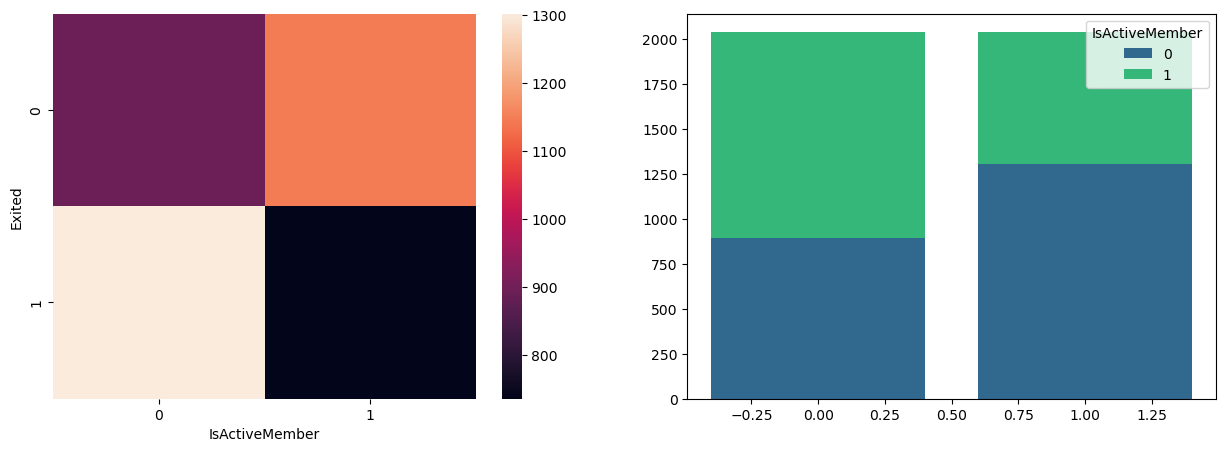

In [83]:
cat_vs_cat(df, "IsActiveMember")

In [85]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
6099,532,Germany,Male,52,9,137755.76,1,1,0,163191.99,Germany_Male,50,468,0,1,0.844133,Low,0.11111,9.0,0,Long-term,73286064.32,0,137755.76,1


## EstimatedSalary vs Exited

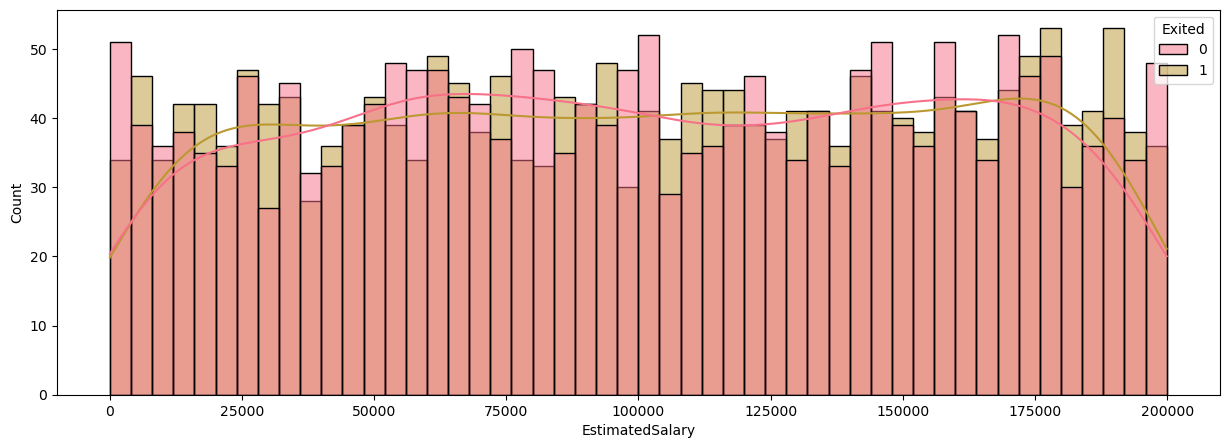

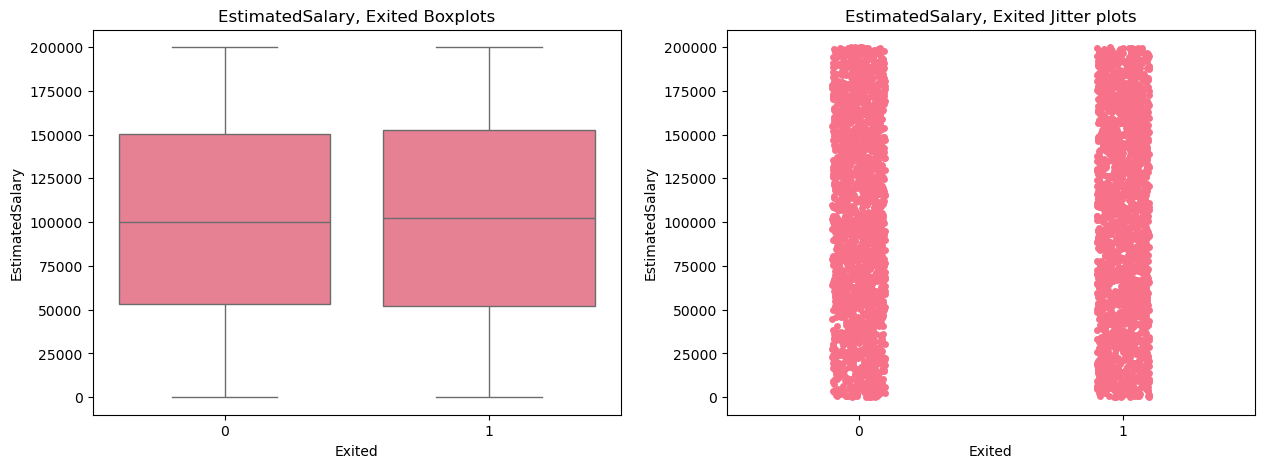

In [86]:
num_vs_cat(df, "EstimatedSalary")

## Geo_Gender vs Exited

In [88]:
pd.crosstab(df["Exited"],df["Geo_Gender"])

Geo_Gender,France_Female,France_Male,Germany_Female,Germany_Male,Spain_Female,Spain_Male
Exited,,,,,,
0,447,644,190,241,214,301
1,460,350,448,366,231,182


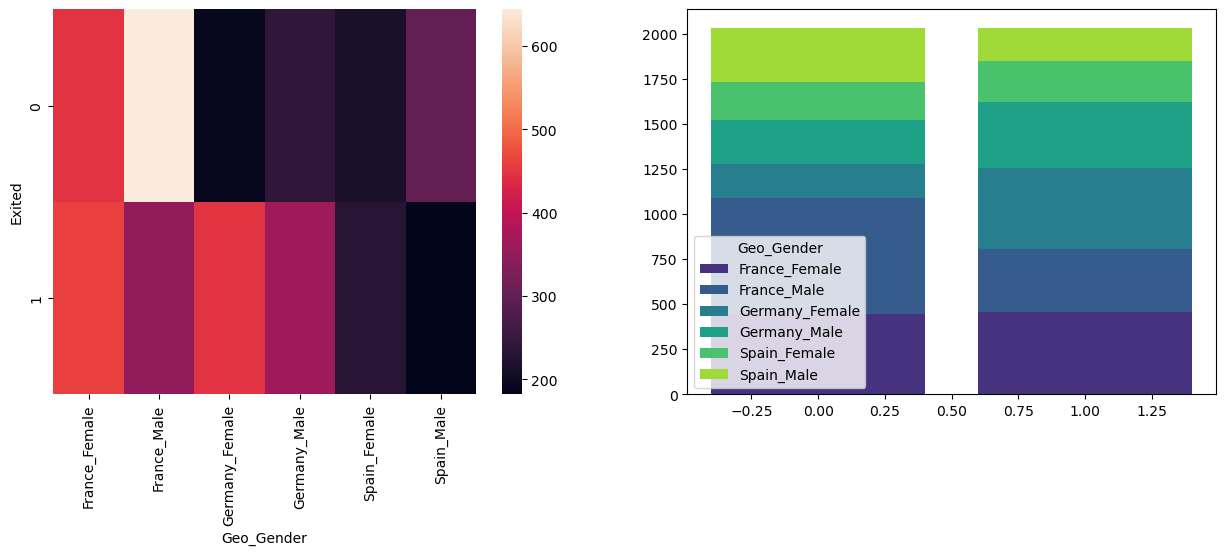

In [87]:
cat_vs_cat(df, "Geo_Gender")

## AgeGroup vs Exited

In [89]:
pd.crosstab(df["Exited"],df["AgeGroup"])

AgeGroup,10,20,30,40,50,60,70,80,90
Exited,,,,,,,,,
0,10,379,983,458,102,67,35,1,2
1,3,121,473,806,487,132,14,1,0


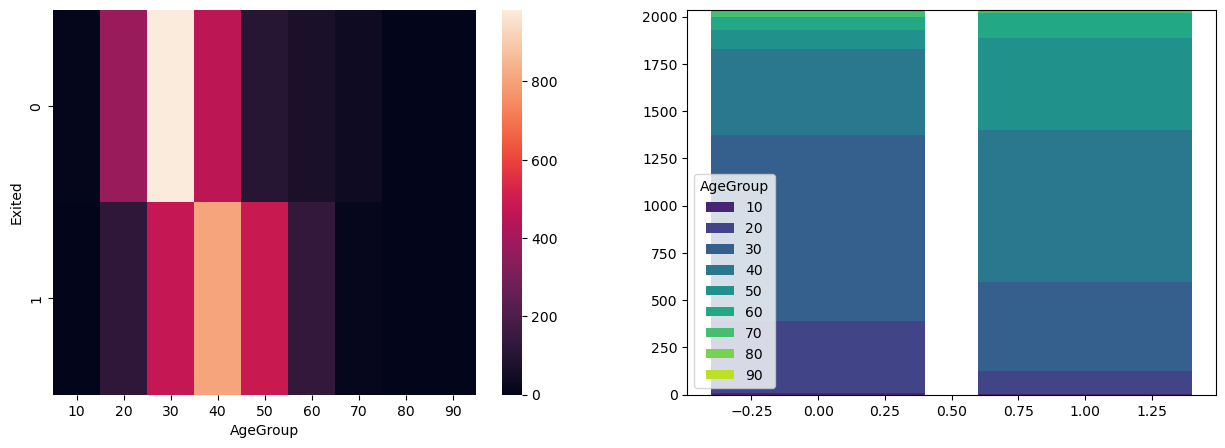

In [92]:
cat_vs_cat(df, "AgeGroup")

In [91]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
5917,674,France,Female,31,1,0.0,1,1,0,128954.05,France_Female,30,31,0,0,0.0,Medium,0.9999,1.0,0,New,0.0,0,0.0,0


## Age_Tenure_Interaction vs Exited

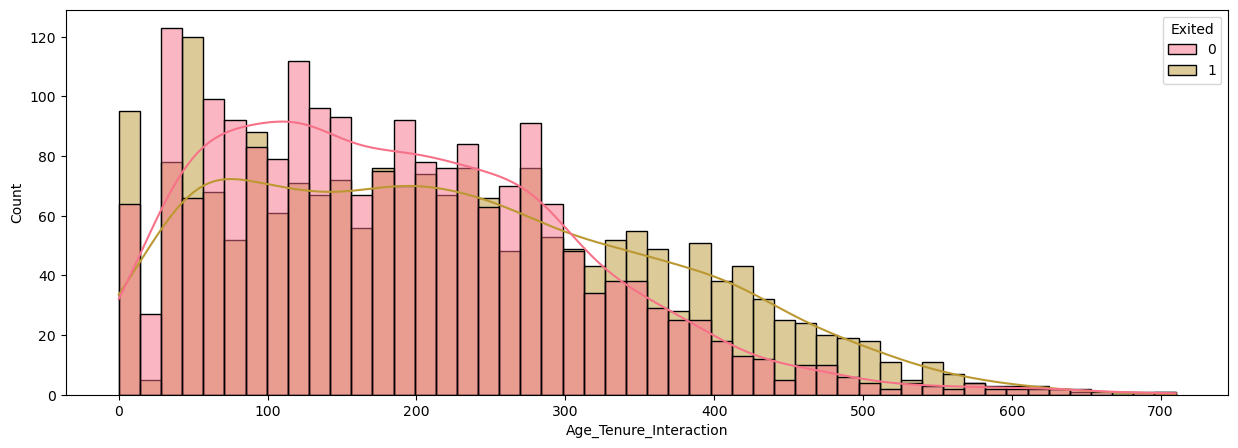

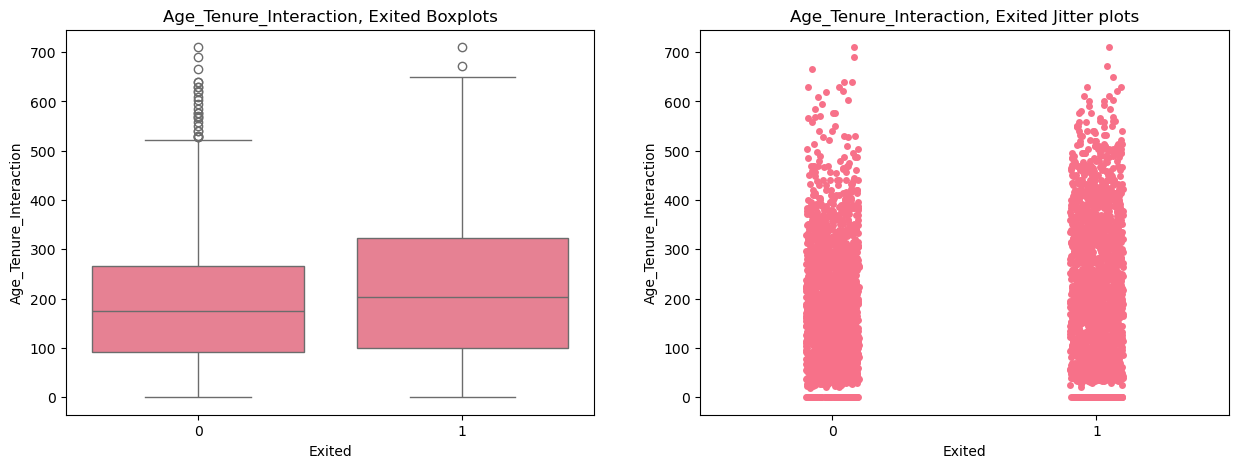

In [94]:
num_vs_cat(df, "Age_Tenure_Interaction")

In [95]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
5831,635,France,Female,27,8,127471.56,1,1,1,152916.05,France_Female,20,216,0,1,0.833605,Low,0.124998,8.0,1,Long-term,80944440.6,0,127471.56,1


## IsSenior vs Exited

In [96]:
pd.crosstab(df["Exited"],df["IsSenior"])

IsSenior,0,1
Exited,,
0,1973,64
1,1994,43


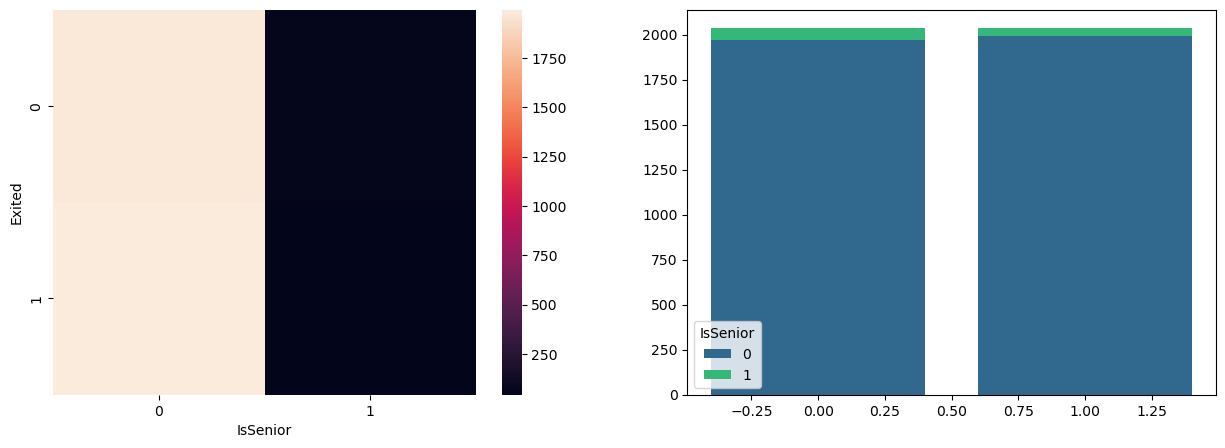

In [97]:
cat_vs_cat(df, "IsSenior")

In [98]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
1487,710,Spain,Female,51,4,93656.95,1,0,1,141400.51,Spain_Female,50,204,0,0,0.662352,Medium,0.249994,4.0,0,Long-term,66496434.5,1,93656.95,1


## High_Balance vs Exited

In [99]:
pd.crosstab(df["Exited"],df["High_Balance"])

High_Balance,0,1
Exited,,
0,1502,535
1,1384,653


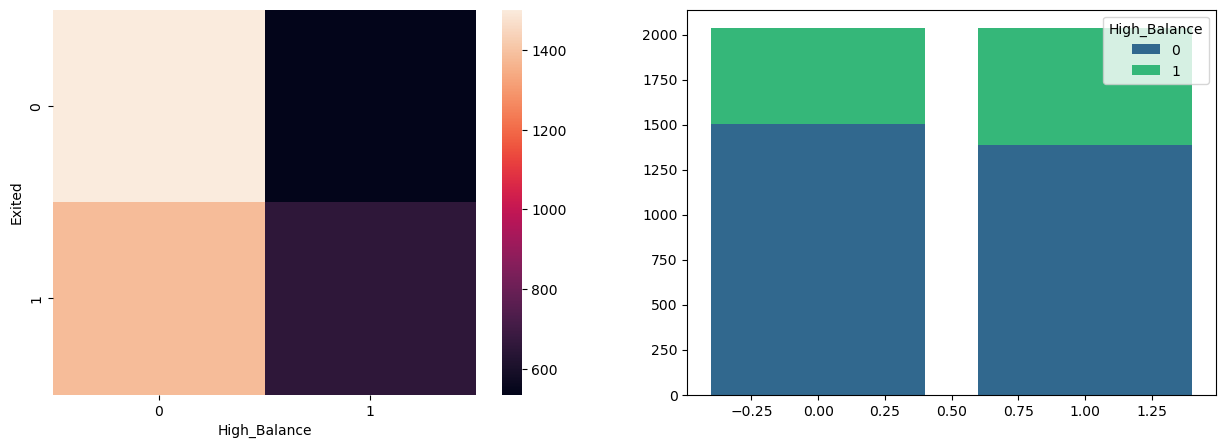

In [100]:
cat_vs_cat(df, "High_Balance")

## Balance_to_Salary_Ratio vs Exited

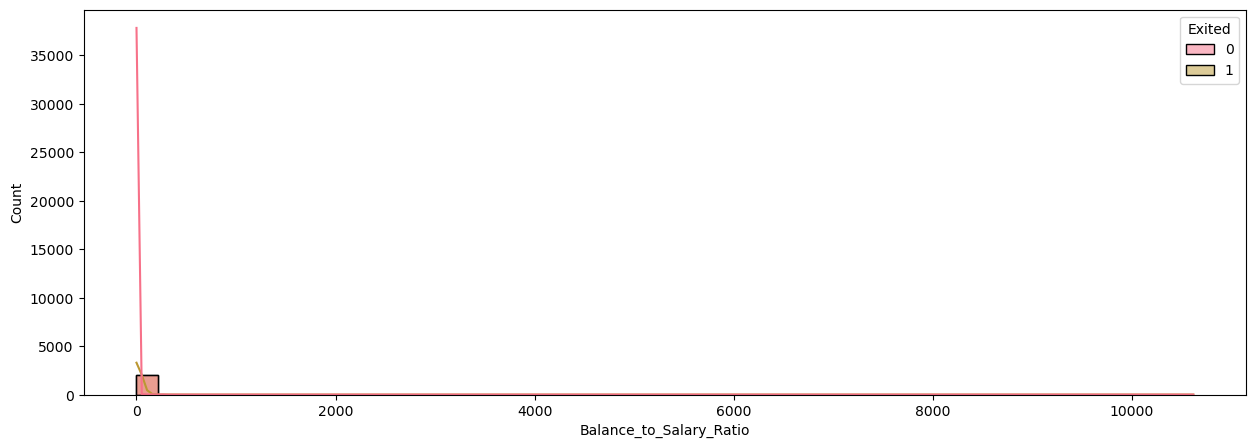

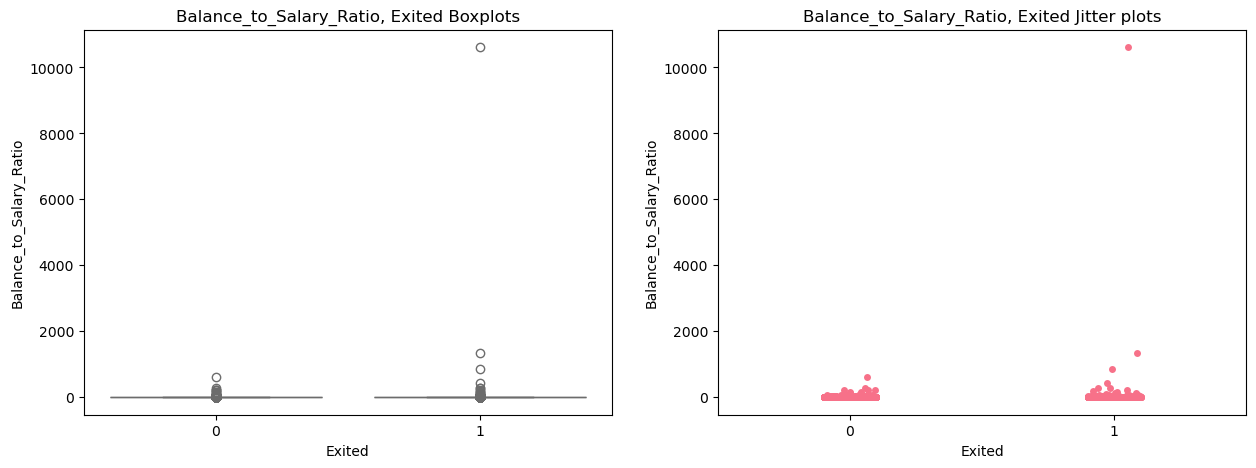

In [104]:
num_vs_cat(df, "Balance_to_Salary_Ratio")

In [105]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
1096,756,Germany,Female,39,3,100717.85,3,1,1,73406.04,Germany_Female,30,117,0,0,1.372065,High,0.999967,1.0,1,Long-term,76142694.6,1,33572.616667,1


## CreditScoreTier vs Exited

In [106]:
pd.crosstab(df['Exited'], df['CreditScoreTier'])

CreditScoreTier,High,Low,Medium
Exited,,,
0,323,995,719
1,313,1057,667


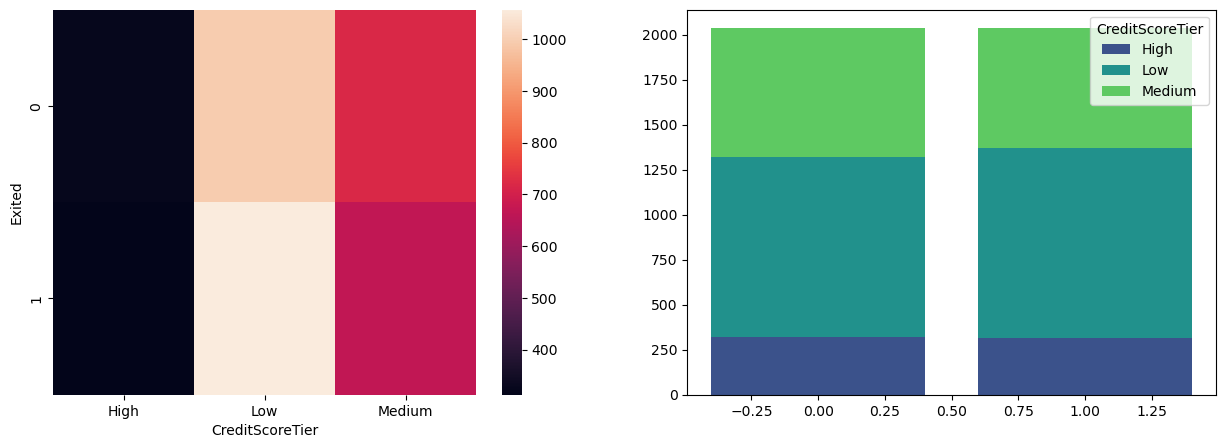

In [108]:
cat_vs_cat(df, "CreditScoreTier")

## Products_Per_Tenure vs Exited

In [110]:
pd.crosstab(df['Exited'], df['Products_Per_Tenure'])

Products_Per_Tenure,0.099999,0.111110,0.124998,0.142855,0.166664,0.199996,0.199998,0.222220,0.249994,0.249997,0.285710,0.299997,0.333322,0.333328,0.333330,0.374995,0.399992,0.399996,0.428565,0.444440,0.499975,0.499988,0.499992,0.499994,0.571420,0.599988,0.666644,0.666656,0.749981,0.799984,0.999900,0.999950,0.999967,0.999975,1.333289,1.499925,1.999800,1.999900,2.999700,3.999600,10000.000000,20000.000000,30000.000000
Exited,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,45,89,90,102,85,92,57,102,107,116,104,0,95,99,2,1,119,0,2,0,95,119,0,0,0,3,111,0,3,0,100,135,2,0,0,1,96,0,1,0,34,30,0
1,62,156,133,120,138,144,19,30,145,36,33,16,136,38,17,24,27,4,19,10,140,42,16,4,5,31,33,4,13,7,168,33,36,3,8,17,35,11,25,4,67,22,6


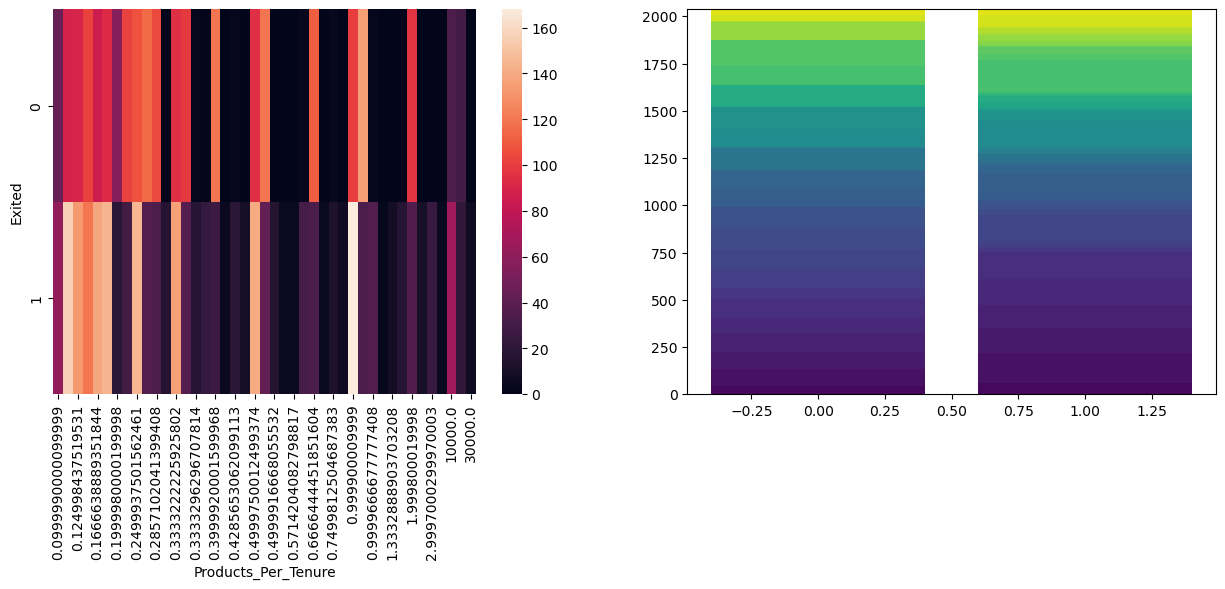

In [113]:
cat_vs_cat(df, "Products_Per_Tenure", legend=False)

In [114]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
644,819,France,Female,39,9,133102.92,1,1,0,27046.46,France_Female,30,351,0,1,4.92127,High,0.11111,9.0,0,Long-term,1.090113e+08,1,133102.92,1


## Average_Product_Holding_Duration vs Exited

In [116]:
pd.crosstab(df['Exited'], df['Average_Product_Holding_Duration'])

Average_Product_Holding_Duration,0.000000,0.250000,0.333333,0.500000,0.666667,0.750000,1.000000,1.250000,1.333333,1.500000,1.666667,1.750000,2.000000,2.250000,2.333333,2.500000,2.666667,3.000000,3.333333,3.500000,4.000000,4.500000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Exited,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,64,0,1,96,1,0,237,0,3,111,3,0,214,0,2,119,1,196,0,104,223,102,149,85,102,90,89,45
1,95,4,25,46,17,8,240,7,13,37,31,5,202,10,19,31,24,191,16,33,181,30,163,138,120,133,156,62


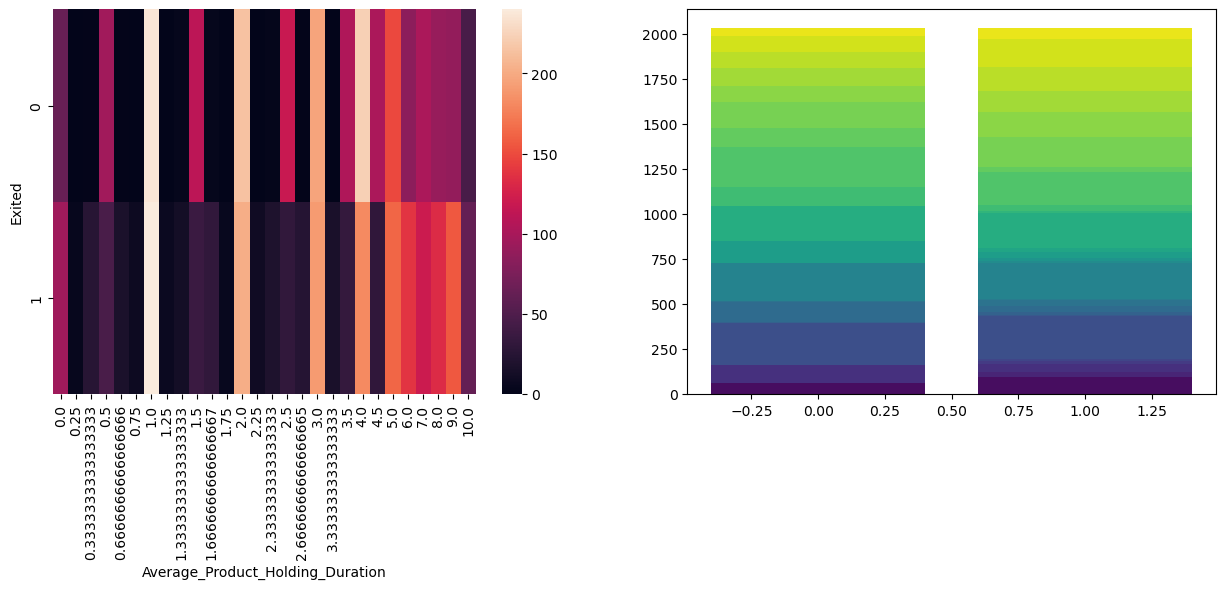

In [117]:
cat_vs_cat(df, "Average_Product_Holding_Duration", legend=False)

## IsActive_by_CreditCard vs Exited

In [118]:
pd.crosstab(df['Exited'], df['IsActive_by_CreditCard'])

IsActive_by_CreditCard,0,1
Exited,,
0,1219,818
1,1555,482


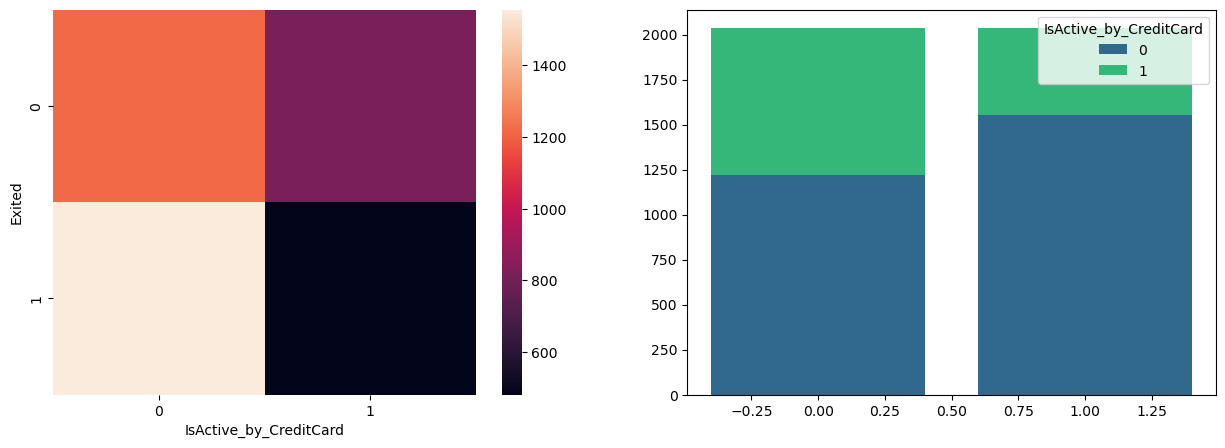

In [119]:
cat_vs_cat(df, "IsActive_by_CreditCard")

## Customer_Status vs Exited

In [120]:
pd.crosstab(df['Exited'], df['Customer_Status'])

Customer_Status,Long-term,New
Exited,,
0,1776,261
1,1710,327


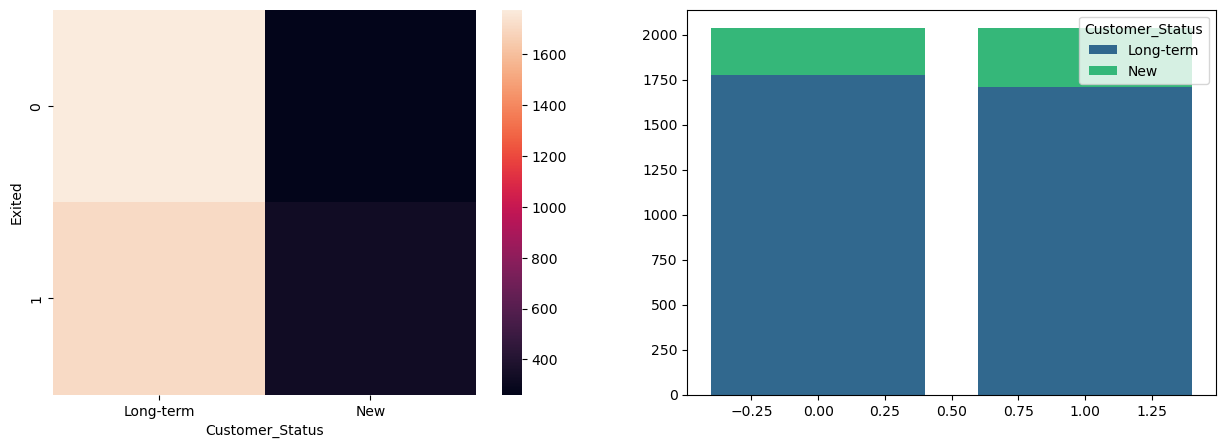

In [121]:
cat_vs_cat(df, "Customer_Status")

In [122]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
2932,688,France,Female,54,9,0.0,1,1,0,191212.63,France_Female,50,486,0,0,0.0,Medium,0.11111,9.0,0,Long-term,0.0,0,0.0,1


## CreditScore_Balance_Interaction vs Exited

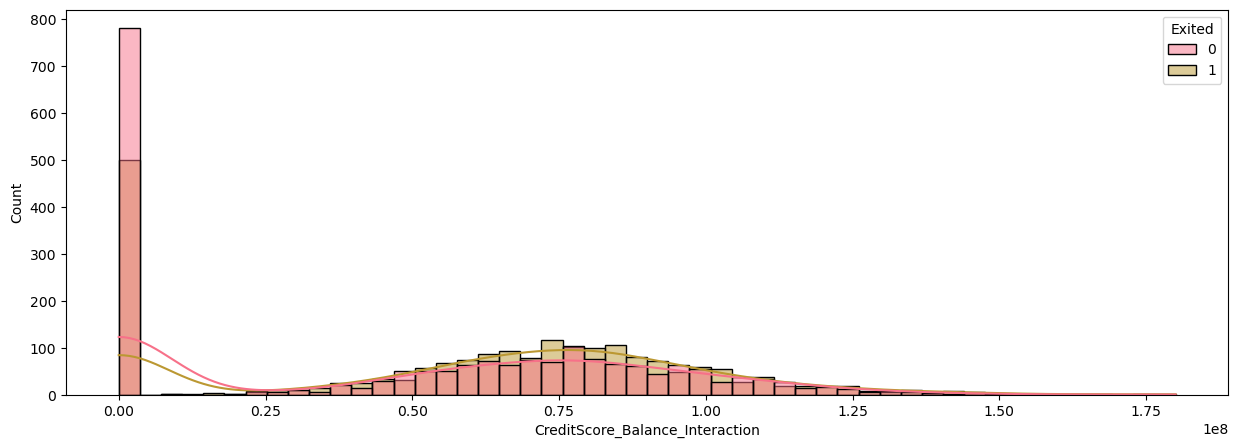

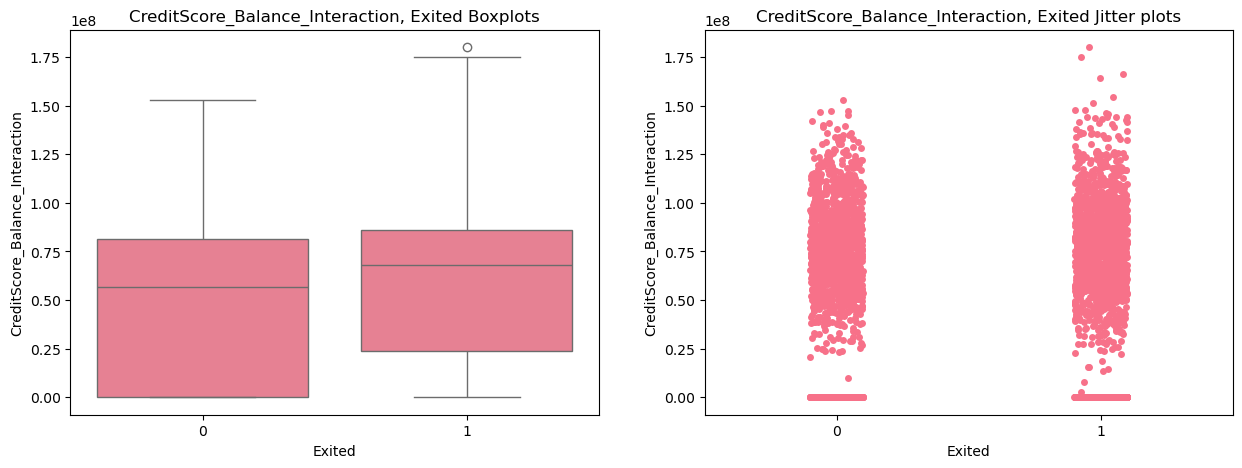

In [124]:
num_vs_cat(df, "CreditScore_Balance_Interaction")

## High_CreditScore vs Exited

In [126]:
pd.crosstab(df['Exited'], df['High_CreditScore'])

High_CreditScore,0,1
Exited,,
0,1399,638
1,1418,619


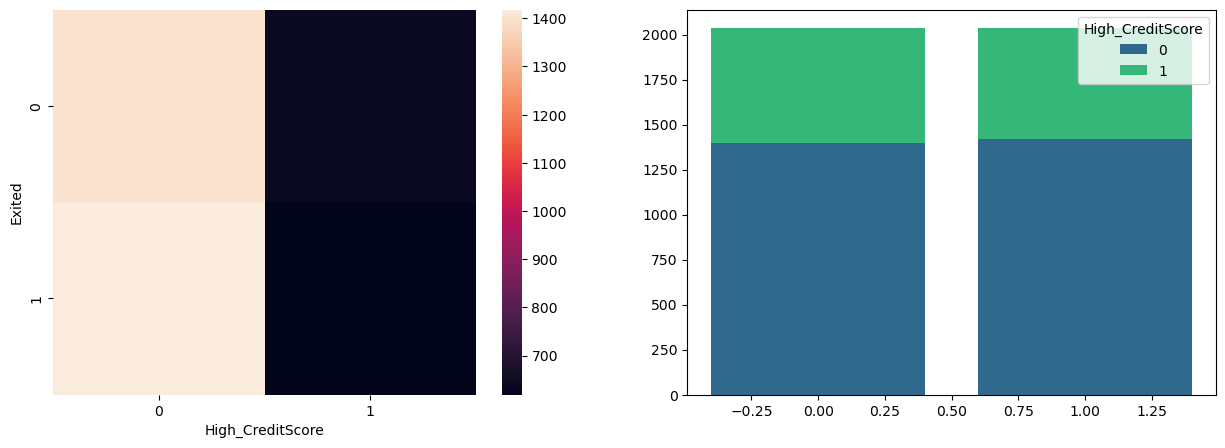

In [127]:
cat_vs_cat(df, "High_CreditScore")

In [128]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product,Exited
9179,693,Spain,Female,34,10,107556.06,2,0,0,154631.35,Spain_Female,30,340,0,0,0.695564,Medium,0.199998,5.0,0,Long-term,74536349.58,0,53778.03,0


## Balance_per_Product vs Exited

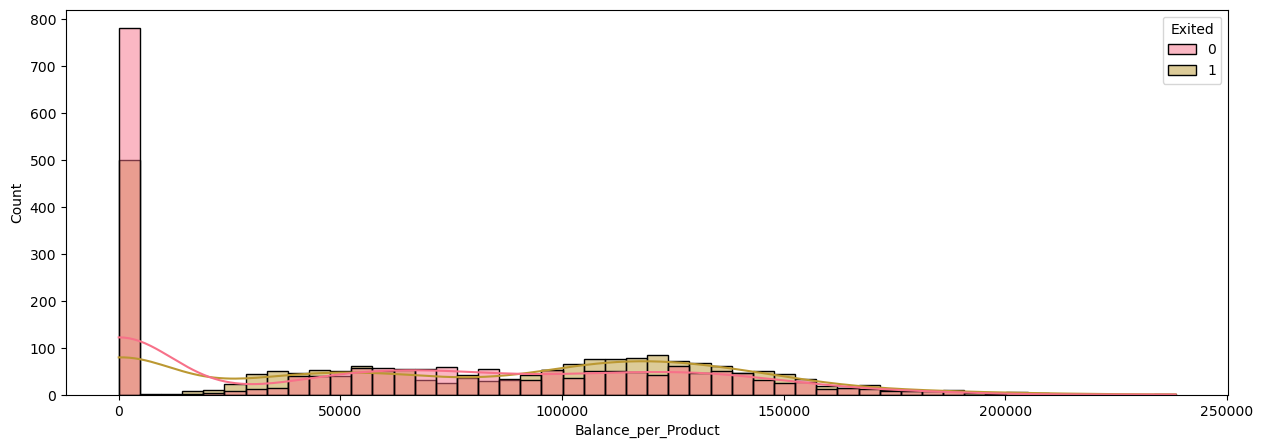

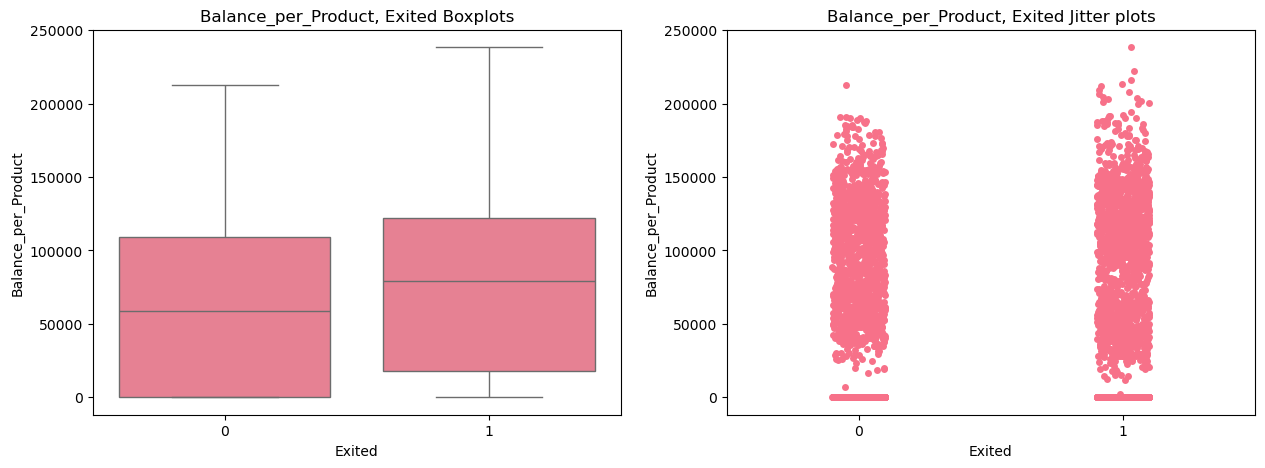

In [129]:
num_vs_cat(df, "Balance_per_Product")

## Pairplot

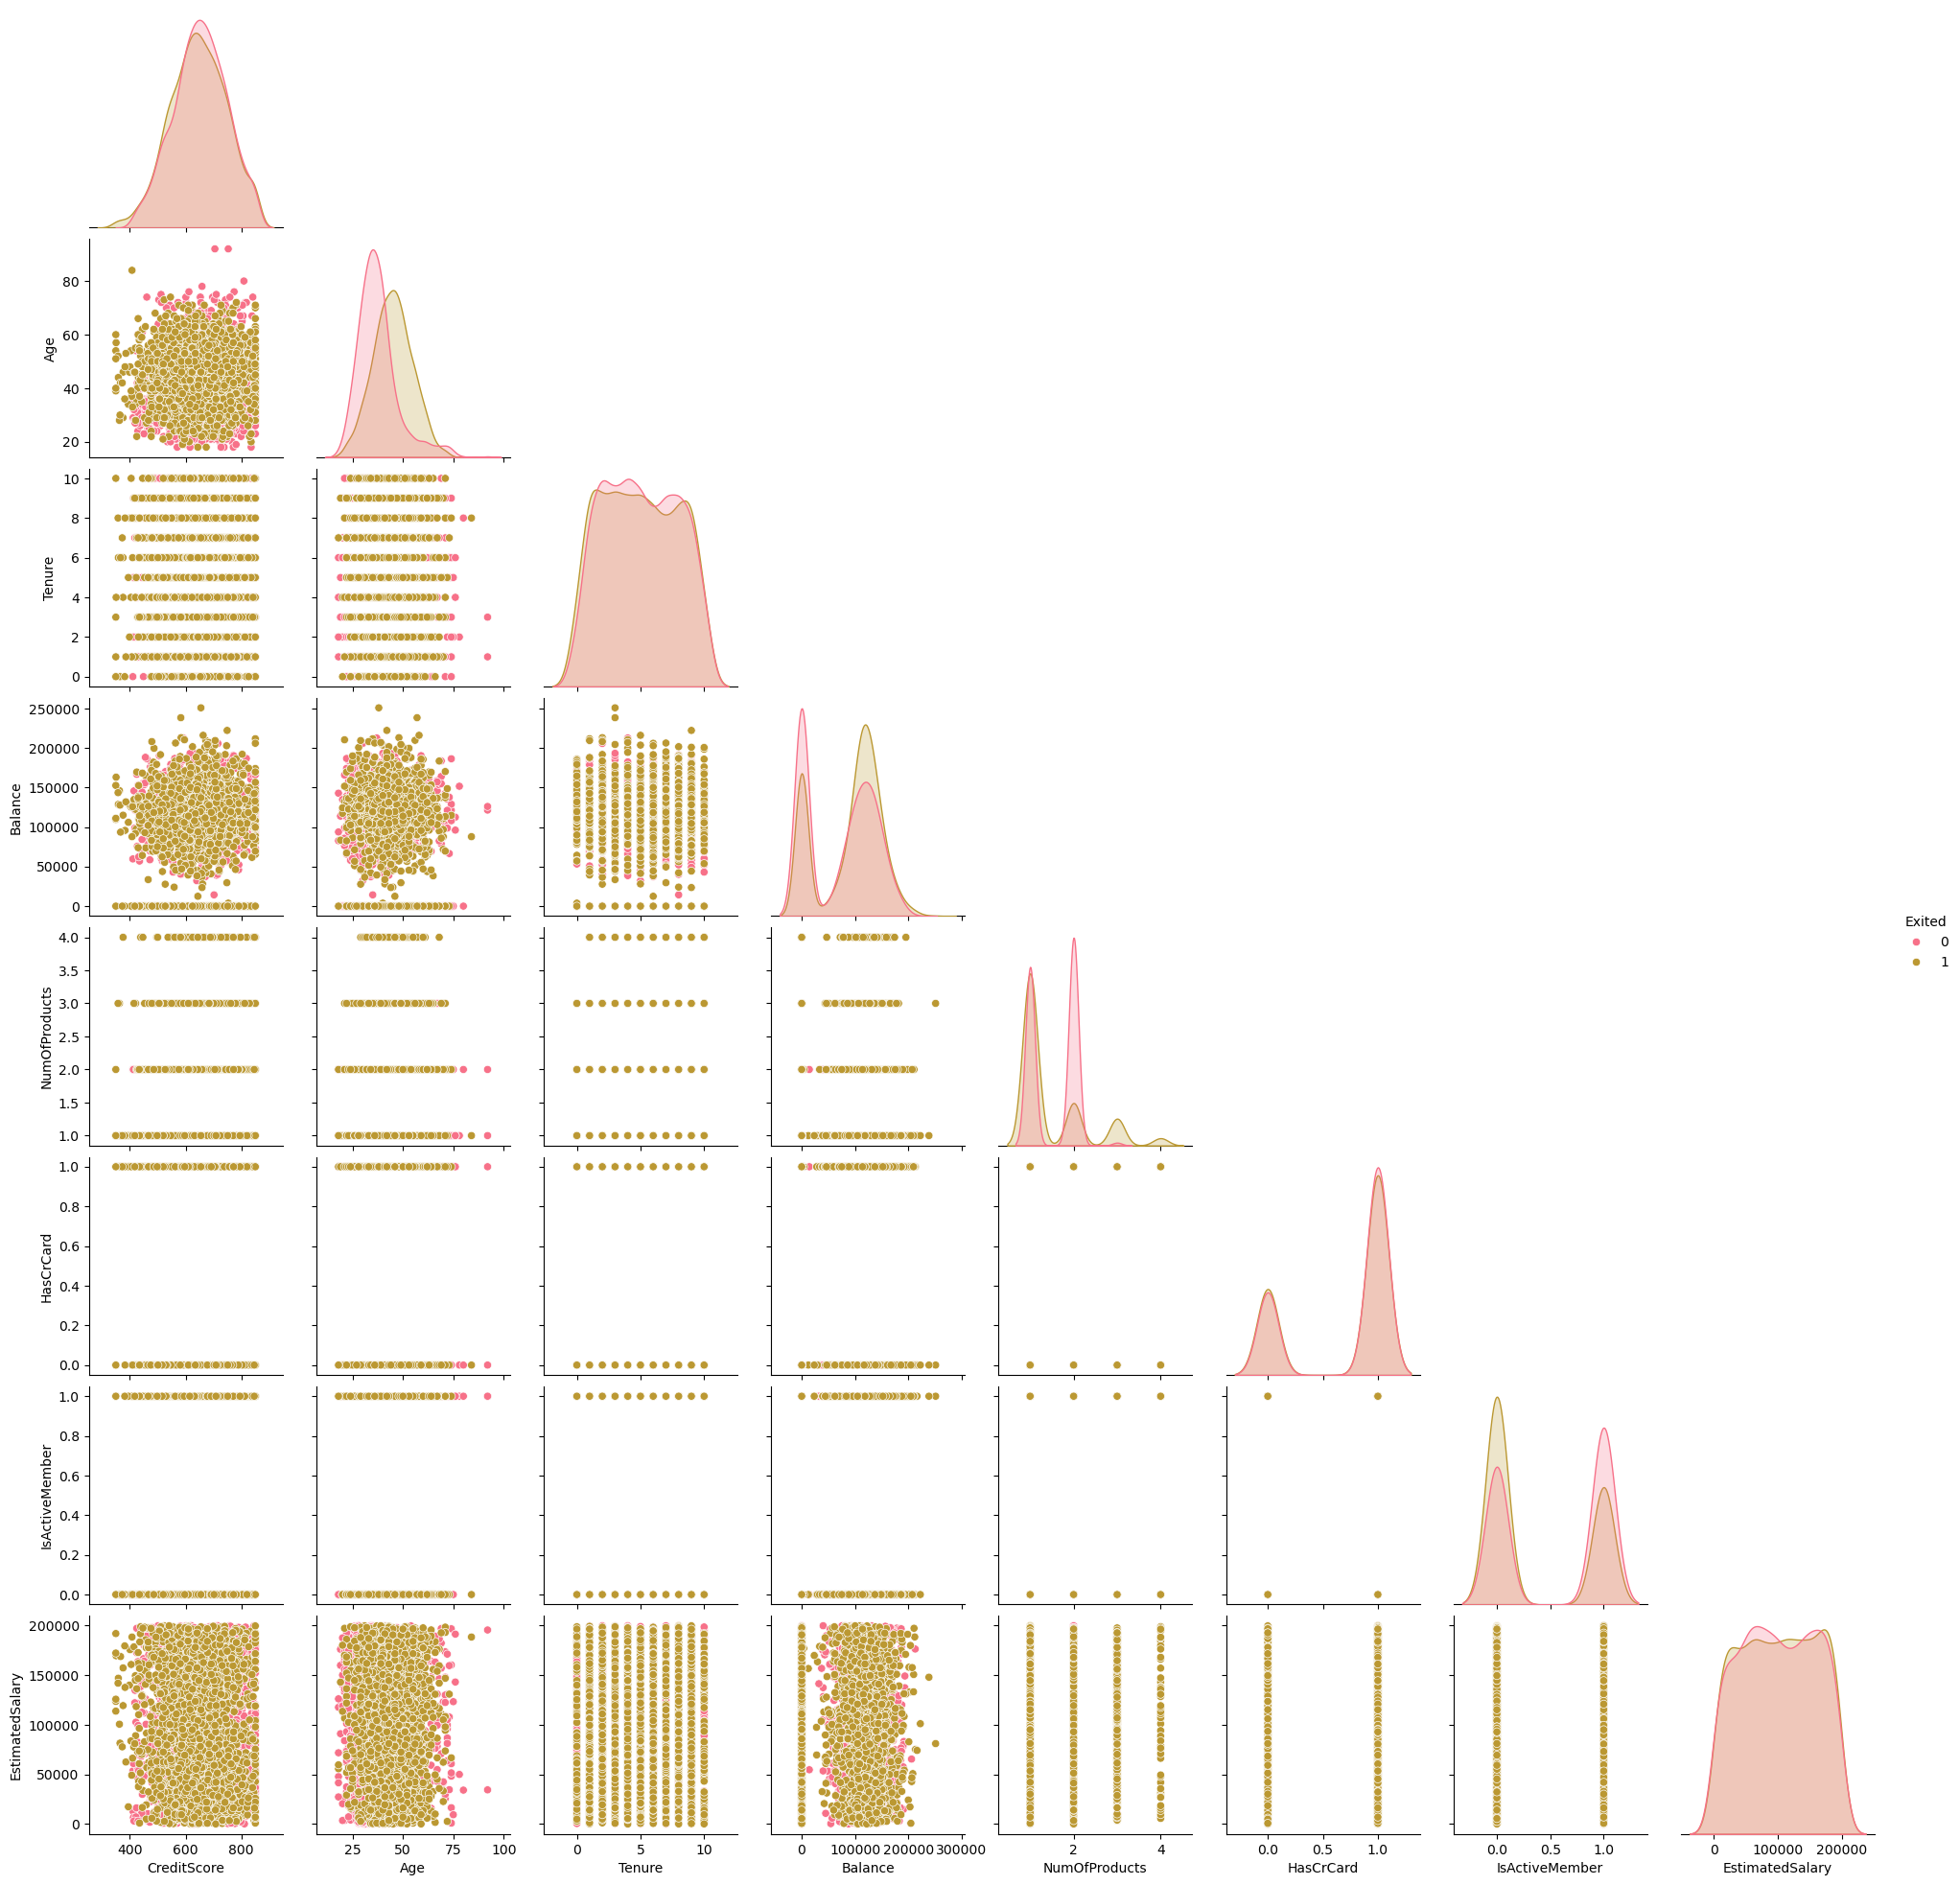

In [143]:
temp = df.iloc[:, :10]
temp['Exited'] = df['Exited']

sns.pairplot(temp, hue="Exited", corner=True)
plt.show()